# Частотный анализ русского текста и построение облака слов

## Загрузка и отображение данных

In [2]:
f = open('pushkin-metel.txt', "r", encoding="utf-8")
text = f.read()

In [3]:
type(text)

str

In [4]:
len(text)

22968

In [5]:
text[:300]

'Метель \n\n\nКони мчатся по буграм, \n\nТопчут снег глубокой \n\nВот, в сторонке божий храм \n\nВиден одинокой. \n\nВдруг метелица кругом; \n\nСнег валит клоками; \n\nЧерный вран, свистя крылом, \n\nВьется над санями; \n\nВещий стон гласит печаль! \n\nКони торопливы \n\nЧутко смотрят в темну даль, \n\nВоздымая гривы\n\n\xa0\xa0\xa0\xa0Жу'

## Предварительная обработка текста

In [ ]:
# перевод в единый регистр (например, нижний)
text = text.lower()

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
type(string.punctuation)

str

In [ ]:
spec_chars = string.punctuation + '\n\xa0«»\t—…'

In [ ]:
%%time
text = "".join([ch for ch in text if ch not in spec_chars])

CPU times: user 2.06 ms, sys: 0 ns, total: 2.06 ms
Wall time: 2.06 ms


In [ ]:
import re
text = re.sub('\n', '', text)

In [ ]:
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

In [ ]:
%%time
text = remove_chars_from_text(text, spec_chars)

CPU times: user 3.33 ms, sys: 0 ns, total: 3.33 ms
Wall time: 3.27 ms


In [ ]:
%%time
text = remove_chars_from_text(text, string.digits)

CPU times: user 1.35 ms, sys: 179 µs, total: 1.53 ms
Wall time: 1.54 ms


## Токенизация текста

In [ ]:
from nltk import word_tokenize
    text_tokens = word_tokenize(text)

In [ ]:
print(type(text_tokens), len(text_tokens))
text_tokens[:10]

<class 'list'> 3402


['метель',
 'кони',
 'мчатся',
 'по',
 'буграм',
 'топчут',
 'снег',
 'глубокой',
 'вот',
 'в']

In [ ]:
import nltk
text = nltk.Text(text_tokens)
print(type(text))
text[:10]

<class 'nltk.text.Text'>


['метель',
 'кони',
 'мчатся',
 'по',
 'буграм',
 'топчут',
 'снег',
 'глубокой',
 'вот',
 'в']

## Расчёт растоты встречаемости слов

In [ ]:
%%time
from nltk.probability import FreqDist
fdist = FreqDist(text)
fdist

CPU times: user 1.47 ms, sys: 0 ns, total: 1.47 ms
Wall time: 1.48 ms


FreqDist({'и': 146, 'в': 101, 'не': 69, 'что': 54, 'с': 44, 'он': 42, 'она': 39, 'ее': 39, 'на': 31, 'было': 27, ...})

In [ ]:
fdist.most_common(5)

[('и', 146), ('в', 101), ('не', 69), ('что', 54), ('с', 44)]

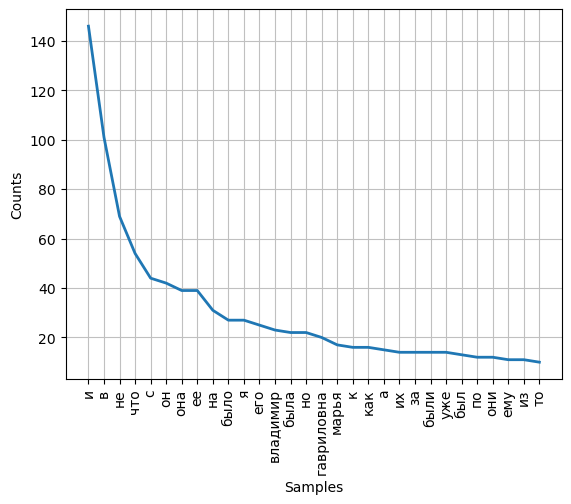

<Axes: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(30,cumulative=False)

## Удаление стоп-слов

In [ ]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words("russian")
russian_stopwords.extend(['это', 'нею'])

In [ ]:
print(len(russian_stopwords))
# russian_stopwords

153


In [ ]:
%%time
text_tokens = [token.strip() for token in text_tokens if token not in russian_stopwords]

CPU times: user 3.14 ms, sys: 0 ns, total: 3.14 ms
Wall time: 3.15 ms


In [ ]:
print(len(text_tokens))

2158


In [ ]:
text = nltk.Text(text_tokens)

In [ ]:
fdist_sw = FreqDist(text)
fdist_sw.most_common(10)

[('владимир', 23),
 ('гавриловна', 20),
 ('марья', 17),
 ('поехал', 9),
 ('бурмин', 9),
 ('поминутно', 8),
 ('метель', 7),
 ('несколько', 6),
 ('сани', 6),
 ('владимира', 6)]

## Построение облака слов

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
text_raw = " ".join(text)

In [ ]:
wordcloud = WordCloud().generate(text_raw)

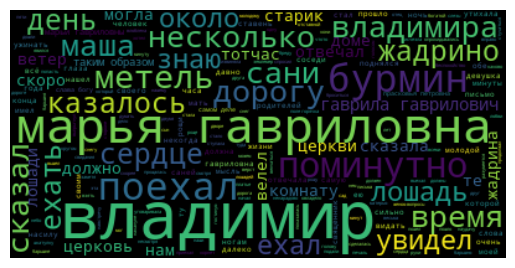

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Нарисовать диаграмму облака слов только для существительных, глаголов, прилагательных
использовать spacy или pymorphy2

In [ ]:
import spacy

In [ ]:
nlp = spacy.load('ru_core_news_sm')

In [ ]:
document = nlp("осень наступила")

In [ ]:
document[0].lemma_, document[0].pos_, document[0].dep_, document[0].norm_

('осень', 'NOUN', 'nsubj', 'осень')

In [ ]:
document[1].lemma_, document[1].pos_, document[1].dep_, document[1].norm_

('наступить', 'VERB', 'ROOT', 'наступила')

In [ ]:
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
print(morph.parse(text_tokens[0]))

[Parse(word='метель', tag=OpencorporaTag('NOUN,inan,femn sing,nomn'), normal_form='метель', score=0.5, methods_stack=((DictionaryAnalyzer(), 'метель', 13, 0),)), Parse(word='метель', tag=OpencorporaTag('NOUN,inan,femn sing,accs'), normal_form='метель', score=0.5, methods_stack=((DictionaryAnalyzer(), 'метель', 13, 3),))]


# Нарисовать диаграмму зависимостей слов для первых 5 предложений

In [ ]:
from spacy import displacy

In [ ]:

doc = nlp("Это пример для первого предложения.")
displacy.serve(doc, style="dep")

/home/oli/miniconda3/envs/NLPExesices/lib/python3.10/site-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

